In [205]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime as dt
import calendar as cd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [206]:
df = pd.read_csv('ukdata.csv')
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [207]:
df.describe()

,quantity,unit_price,cust_id
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [208]:
print('The shape of the data is', df.shape)
print('\n')
df.info()

The shape of the data is (541909, 8)


<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [209]:
df.isna().sum(axis = 0).sort_values(ascending = False) # indicates the null entries, we have to remove them for better analysis

cust_id         135080
description       1454
country              0
unit_price           0
invoice_date         0
quantity             0
stock_code           0
invoice_num          0
dtype: int64

**Parameters of dropna** - 

**axis:** axis takes int or string value for rows/columns. Input can be 0 or 1 for Integer and ‘index’ or ‘columns’ for String

**how**: how takes string value of two kinds only (‘any’ or ‘all’). ‘any’ drops the row/column if ANY value is Null and ‘all’ drops only if ALL values are null.

**thresh**: thresh takes integer value which tells minimum amount of na values to drop.

**subset**: It’s an array which limits the dropping process to passed rows/columns through list.

**inplace:** It is a boolean which makes the changes in data frame itself if True.

In [210]:
df.dropna(how = 'any', inplace = True)

print('Shape of modified data is ', df.shape)
print('\n')
print('None values in the db')
df.isna().sum(axis=0)

Shape of modified data is  (406829, 8)


None values in the db


invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

We have dropped rows containing null values, now we'll remove duplicate values

In [211]:
print('Duplicates in db ', df.duplicated(keep='first').sum(axis=0))
print('\n')
df.drop_duplicates(inplace = True)
print('Duplicated in the db now', df.duplicated(keep = 'first').sum(axis=0))
print('The shape of the db is ', df.shape)

Duplicates in db  5225


Duplicated in the db now 0
The shape of the db is  (401604, 8)


In [212]:
df = df[df.quantity>0] #quantity cant be negative
print('The shape of the db is ', df.shape)

The shape of the db is  (392732, 8)


In [213]:
print('Number of transactions: ', df['invoice_num'].nunique())
print('Number of customers: ', df['cust_id'].nunique())
print('Number of products:', df['description'].nunique())
print('Number of countries in which these products are sold:', df['country'].nunique())

Number of transactions:  18536
Number of customers:  4339
Number of products: 3877
Number of countries in which these products are sold: 37


In [214]:
df['invoice_date'] = pd.to_datetime(df.invoice_date)
df['cust_id'] = df['cust_id'].astype('int64')
df['description'] = df.description.str.lower()
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [215]:
df['total_cost'] = df['quantity']*df['unit_price']  #we calculate the total amount spent by each user 
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,total_cost
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [216]:
df = df[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','total_cost','cust_id','country']]

#### Orders made by each customer grouped by country

In [217]:
df.groupby(by = ['cust_id', 'country'], as_index = False)[ 'invoice_num'].count().head(10)

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
5,12352,Norway,85
6,12353,Bahrain,4
7,12354,Spain,58
8,12355,Bahrain,13
9,12356,Portugal,59


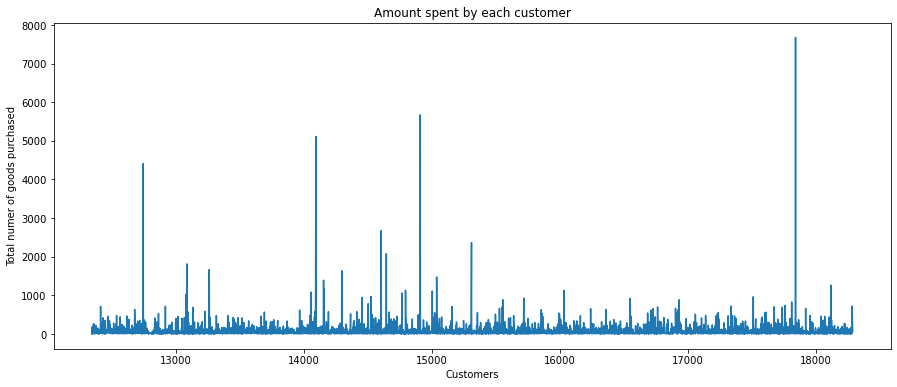

In [218]:
orders= df.groupby(by = ['cust_id', 'country'], as_index = False)['invoice_num'].count()
orders.rename(columns = {'invoice_num':'total_orders'}, inplace = True)
plt.subplots(figsize = (15,6))
plt.plot(orders.cust_id, orders.total_orders)
plt.title('Amount spent by each customer')
plt.xlabel('Customers')
plt.ylabel('Total numer of goods purchased')
plt.show()

In [219]:
# orders placed by the top 5 customers
orders.sort_values(by = 'total_orders', ascending = False).head()

,cust_id,country,total_orders
4019,17841,United Kingdom,7676
1888,14911,EIRE,5672
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4413
1670,14606,United Kingdom,2677


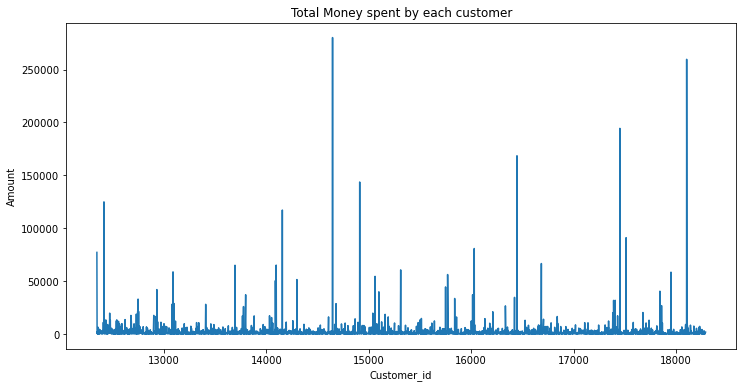

In [220]:
money_spent = df.groupby(by = ['cust_id', 'country'], as_index = False)['total_cost'].sum()

x = money_spent['cust_id']
y = money_spent['total_cost']
plt.figure(figsize = (12,6))
plt.plot(x, y)
plt.title('Total Money spent by each customer')
plt.ylabel('Amount')
plt.xlabel('Customer_id')
plt.show()

### Total Money spent by each country

In [221]:
money_spent.sort_values(by = 'total_cost', ascending = False).head()

,cust_id,country,total_cost
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194390.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143711.17


In [222]:
# loc is used to locate the new column ahead of invoice_date column
df.insert(loc=2, column='year_month', value=df['invoice_date'].map(lambda x: 100*x.year + x.month)) 
df.insert(loc=3, column='month', value=df.invoice_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df.insert(loc=4, column='day', value=(df.invoice_date.dt.dayofweek)+1)
df.insert(loc=5, column='hour', value=df.invoice_date.dt.hour)
df.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,total_cost,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


### Number of orders recieved in different months

In [223]:
# viewing orders in each month
month_agg = df.groupby(by = 'month', as_index = False)['invoice_num'].count()
month_agg.rename(columns = {'month':'month_no', 'invoice_num': 'total_orders' }, inplace = True)
month_agg['month'] = month_agg['month_no'].apply(lambda x: cd.month_abbr[x])
month_agg = month_agg[['month_no','month','total_orders']]
month_agg

,month_no,month,total_orders
0,1,Jan,20991
1,2,Feb,19707
2,3,Mar,26872
3,4,Apr,22435
4,5,May,28075
5,6,Jun,26926
6,7,Jul,26582
7,8,Aug,26796
8,9,Sep,39671
9,10,Oct,48796


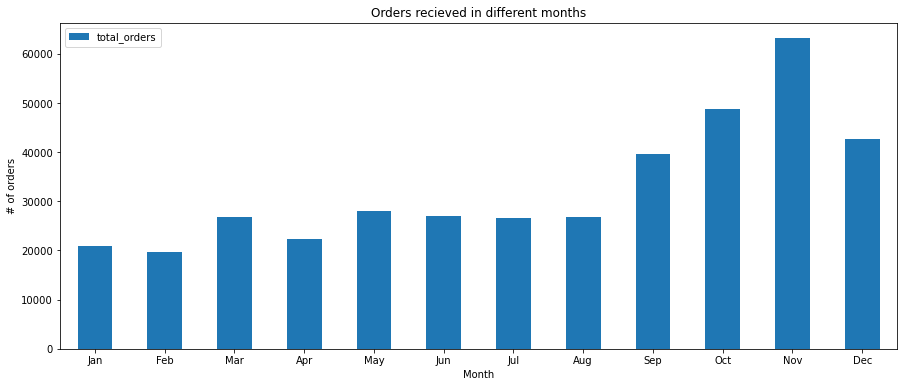

In [224]:
x1 = month_agg['month']
y1 = month_agg['total_orders']
ax = month_agg.plot.bar(x= 'month', y= 'total_orders', rot = 0, figsize = (15, 6))
plt.title('Orders recieved in different months')
plt.xlabel('Month')
plt.ylabel('# of orders')
plt.show()

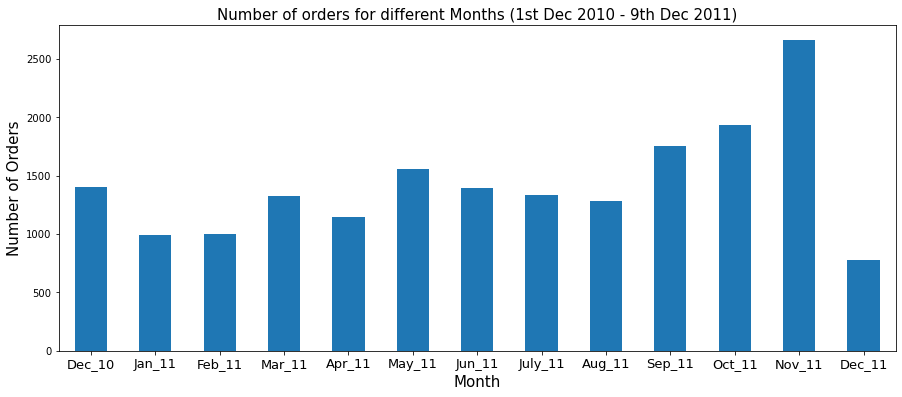

In [225]:
bx = df.groupby(by = 'invoice_num')['year_month'].unique().value_counts().sort_index().plot(kind = 'bar',figsize=(15,6))
bx.set_xlabel('Month',fontsize=15)
bx.set_ylabel('Number of Orders',fontsize=15)
bx.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
bx.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

In [226]:
df.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,total_cost,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [227]:
# orders per day
days = df.groupby(by = 'day', as_index = False)['invoice_num'].count()
days.rename(columns = {'day':'day_no', 'invoice_num': 'total_orders'}, inplace = True)
days

,day_no,total_orders
0,1,64237
1,2,65747
2,3,68043
3,4,79260
4,5,54231
5,7,61214


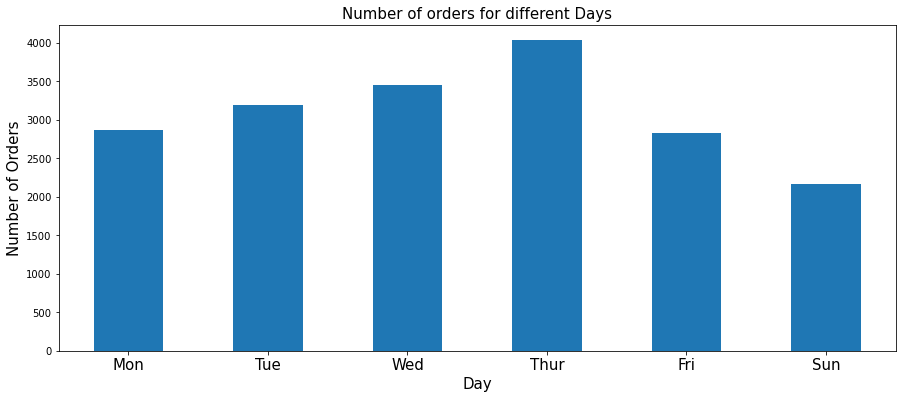

In [228]:
# we can draw inference that there is an off on saturday
ux = df.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(kind = 'bar',figsize=(15,6))
ux.set_xlabel('Day',fontsize=15)
ux.set_ylabel('Number of Orders',fontsize=15)
ux.set_title('Number of orders for different Days',fontsize=15)
ux.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

We infer that **Saturday** is an off day for the client.

In [229]:
df.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,total_cost,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


### Total orders placed in different hours of the day

In [230]:
df.groupby(by = 'hour', as_index = False)['invoice_num'].count()

,hour,invoice_num
0,6,1
1,7,379
2,8,8688
3,9,21928
4,10,37775
5,11,48373
6,12,70942
7,13,63024
8,14,53260
9,15,44793


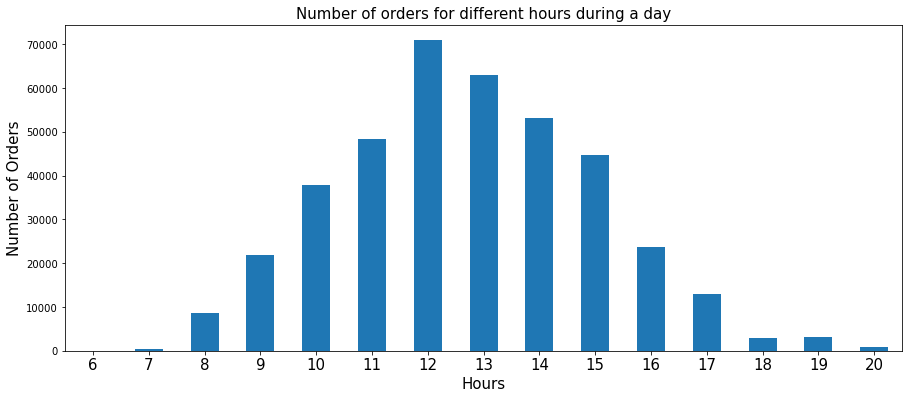

In [231]:
sx = df.groupby(by = 'hour')['invoice_num'].count().plot(kind = 'bar',figsize=(15,6))
sx.set_xlabel('Hours',fontsize=15)
sx.set_ylabel('Number of Orders',fontsize=15)
sx.set_title('Number of orders for different hours during a day',fontsize=15)
sx.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

We see that there are items with - cost price, which means they have delievered free items to customers

In [232]:
df_free= df[df['unit_price']==0]
print('Number of free items = ', df[df['unit_price']==0].invoice_num.count())
df_free.head()

Number of free items =  40


,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,total_cost,cust_id,country
9302,537197,2010-12-05 14:02:00,201012,12,7,14,22841,round cake tin vintage green,1,0.0,0.0,12647,Germany
33576,539263,2010-12-16 14:36:00,201012,12,4,14,22580,advent calendar gingham sack,4,0.0,0.0,16560,United Kingdom
40089,539722,2010-12-21 13:45:00,201012,12,2,13,22423,regency cakestand 3 tier,10,0.0,0.0,14911,EIRE
47068,540372,2011-01-06 16:41:00,201101,1,4,16,22090,paper bunting retrospot,24,0.0,0.0,13081,United Kingdom
47070,540372,2011-01-06 16:41:00,201101,1,4,16,22553,plasters in tin skulls,24,0.0,0.0,13081,United Kingdom


In [233]:
df_free.year_month.value_counts().sort_index() #this shows number of free items sold in each month

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

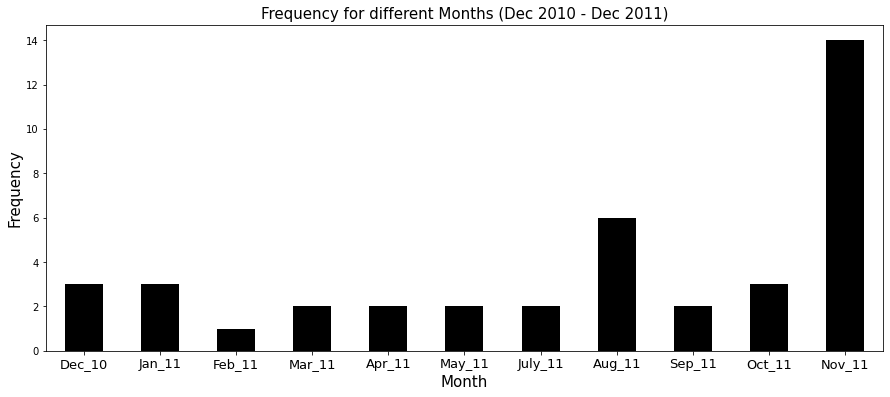

In [234]:
fx = df_free.year_month.value_counts().sort_index().plot(kind ='bar', figsize = (15,6), color = 'black')
fx.set_xlabel('Month',fontsize=15)
fx.set_ylabel('Frequency',fontsize=15)
fx.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
fx.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

In [235]:
print('Average number of free products given in a month are = ', (df_free.invoice_num.count())/(df_free.year_month.nunique()) )

Average number of free products given in a month are =  3.6363636363636362


In [236]:
# now groupby orders placed by each country
country = df.groupby(by ='country')['invoice_num'].count().sort_values(ascending = True)
#country.rename(columns = {'invoice_num': 'total_orders'}, inplace = True)
country

country
Saudi Arabia                 9
Bahrain                     17
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Unspecified                241
Israel                     245
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Sweden                     450
Cyprus                     603
Finland                    685
Channel Islands            747
Italy                      758
Norway                    1072
Australia                 1184
Portugal                  1453
Switzerland               1842
Belgium                   2031
Netherlands               2363


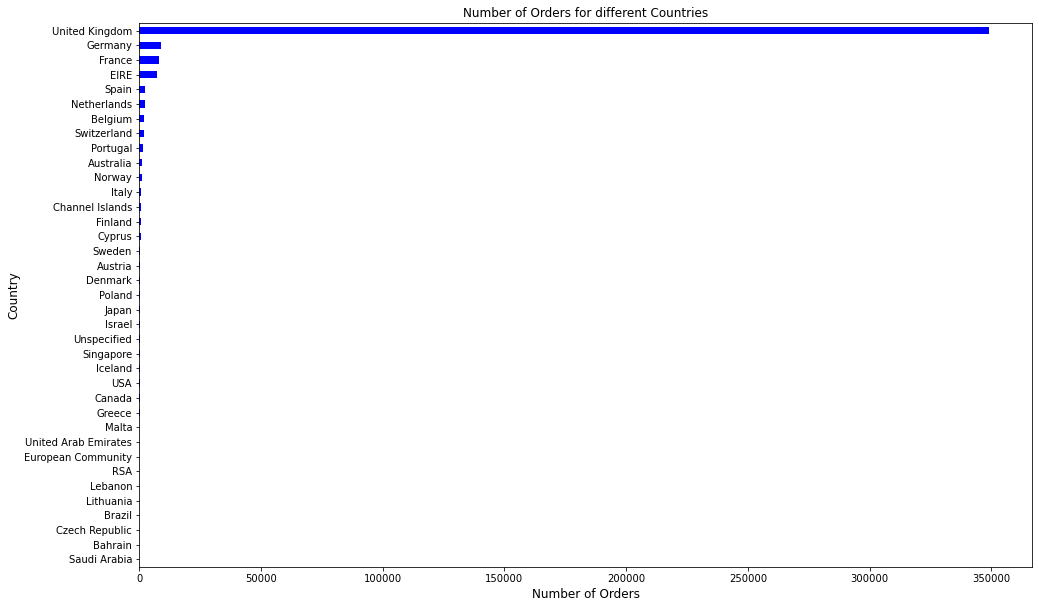

In [237]:
cx = country.plot(kind = 'barh', figsize = (16,10), color = 'blue')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

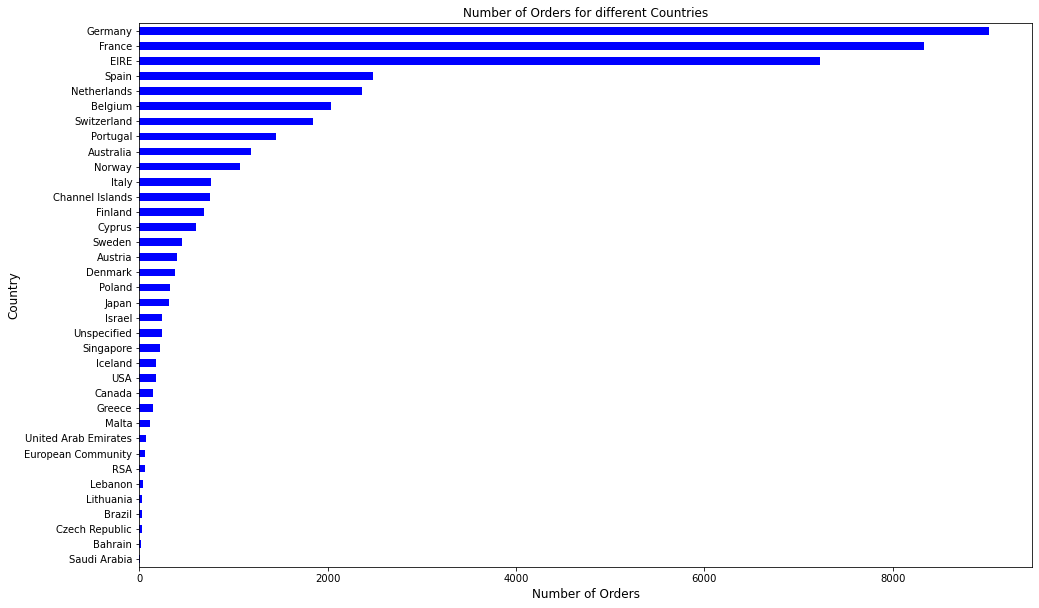

In [238]:
#we can observe from the above graph that uk has the maximum number of orders, in order to have a better understanding for the rest of the countries, we need to remove uk and then analyze orders from the rest of the countries
del country['United Kingdom']
country.plot(kind = 'barh', figsize = (16,10), color = 'blue')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

In [239]:
# if we had to categorize by the max amount of money spent by each country

country_exp = df.groupby(by = 'country')['total_cost'].sum().sort_values(ascending = True)
country_exp

country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.660770e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.760520e+03
Israel                  7.215840e+03
Poland                  7.334650e+03
Austria                 1.019868e+04
Cyprus                  1.350285e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.044054e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.337584e+04
Norway                  3.616544e+04
Japan                   3.7416

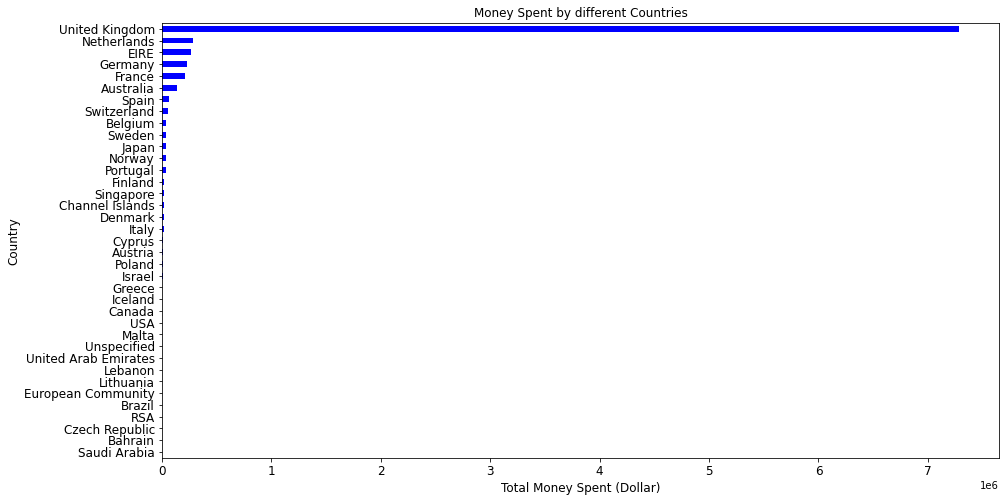

In [240]:
plt.subplots(figsize=(15,8))
country_exp.plot(kind = 'barh', fontsize=12, color= 'blue')
plt.xlabel('Total Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

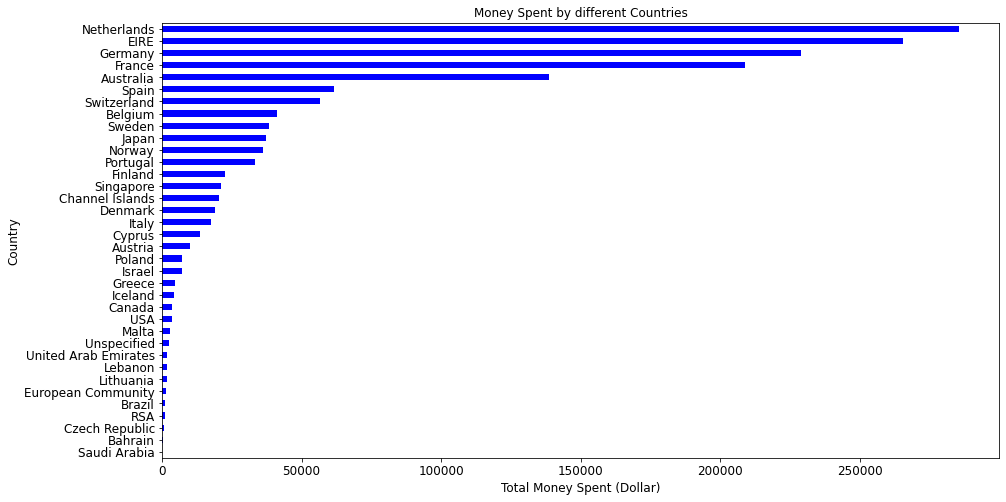

In [241]:
del country_exp['United Kingdom']
plt.subplots(figsize=(15,8))
country_exp.plot(kind = 'barh', fontsize=12, color= 'blue')
plt.xlabel('Total Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

## Calculating RFM Metrics

**Recency** - refers to freshness of the customer's activity (Time since last engagement with the product by the customer)

**Frequency** - refers to frequency of customer transaction or visits (Median time between transactions to buy the product)

**Monetory** - Intention of customer to spend (purchasing power of the customer)

In [242]:
df = pd.read_csv("ukdata.csv")
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)
df.dropna(how = 'any', inplace = True)
df.drop_duplicates(inplace = True)
df['invoice_date'] = pd.to_datetime(df.invoice_date)
df['cust_id'] = df['cust_id'].astype('int64')
df['description'] = df.description.str.lower()
df = df[df.quantity>0]
df['total_cost']= df['unit_price']*df['quantity']
df.insert(loc=2, column='year_month', value=df['invoice_date'].map(lambda x: 100*x.year + x.month)) 
df.insert(loc=3, column='month', value=df.invoice_date.dt.month)
df.insert(loc=4, column='day', value=(df.invoice_date.dt.dayofweek)+1)
df.insert(loc=5, column='hour', value=df.invoice_date.dt.hour)

df.head()

,invoice_num,stock_code,year_month,month,day,hour,description,quantity,invoice_date,unit_price,cust_id,country,total_cost
0,536365,85123A,201012,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,201012,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [243]:
rfm_data = df.groupby(by = 'cust_id', as_index = False)[['total_cost']].sum()
rfm_data.rename(columns = {'total_cost' : 'monetory'}, inplace = True)
rfm_data.head()

,cust_id,monetory
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [244]:
xyz = df.groupby(by ='cust_id', as_index= False)['invoice_num'].count()
rfm_data['frequency'] =xyz['invoice_num']
rfm_data.head()

,cust_id,monetory,frequency
0,12346,77183.60,1
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


In [245]:
max_date = df['invoice_date'].max()
max_date

Timestamp('2011-12-09 12:50:00')

In [246]:
#max_date['invoice_date'] = pd.to_datetime(max_date['invoice_date'])
#df['invoice_date'] = pd.to_datetime(df['invoice_date'])
#for rows in df.rows():
    #if df['cust_id'] == max_date['cust_id']:
        #df['cust_id']['recent_purchase_date'] == max_date['invoice_date']
#max_date['cust_id']=max_date['cust_id'].astype('int64')
df['diff'] = max_date - df['invoice_date']
abc = df.groupby(by = 'cust_id', as_index = False)['diff'].min()
rfm_data['recency'] = abc['diff']
rfm_data['recency'] = rfm_data['recency'].dt.days
rfm_data.head()

,cust_id,monetory,frequency,recency
0,12346,77183.60,1,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309


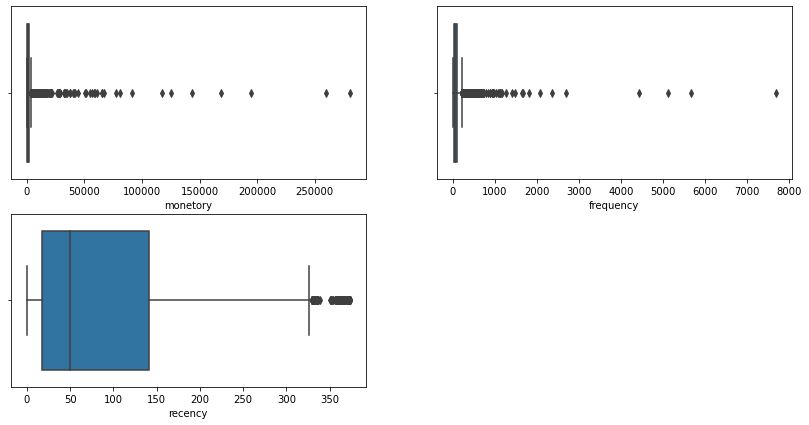

In [247]:
features = rfm_data.columns[1:]
r = c = 0
fig, ax = plt.subplots(2,2, figsize = (14, 7))
for n, i in enumerate(features):
    sns.boxplot(x = i, data = rfm_data, ax = ax[r, c])
    c +=1
    if (n+1)%2 == 0:
        r+=1
        c=0
ax[r,c].axis('off')
plt.show()
    

In [248]:
h_cap = 0.95
l_cap = 0.05
cap = 0.95
h_cap_val = rfm_data['monetory'].quantile(h_cap)
l_cap_val = rfm_data['monetory'].quantile(l_cap)
cap_val = rfm_data['frequency'].quantile(cap)

In [249]:
a = rfm_data['monetory'] > h_cap_val
b = rfm_data['monetory'] < l_cap_val
c = rfm_data['frequency'] > cap_val
rfm_data.loc[a, 'monetory'] = h_cap_val # for all the data greater h_cap_val, the data will be equal to h_cap_val
rfm_data.loc[b, 'monetory'] = l_cap_val
rfm_data.loc[c, 'frequency' ] = cap_val

0 1 0 monetory
1 0 1 frequency
1 1 2 recency


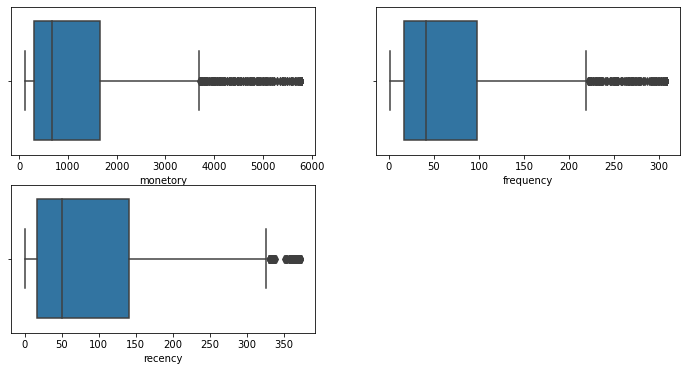

In [250]:
r = c = 0
fig,ax = plt.subplots(2,2,figsize=(12,6)) #unpack this tuple into the variables fig and ax. 
#Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png'))

for n,i in enumerate(features):
    sns.boxplot(x=i, data=rfm_data,ax=ax[r,c]) #x is column name, n is index (0, 1 , 2)
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
    print(r, c, n, i)
ax[r,c].axis("off") # wont show axis lins which is not needed in boxplots
plt.show()

### Creating pipeline for feature scaling and dimensionality reduction

In [251]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA #Principal Component Analysis
#Singular Value Decomposition

In [252]:
#The estimated number of components. When n_components is set to ‘mle’ or a number between 0 and 1 (with svd_solver == ‘full’) this number is estimated from input data. 
#Otherwise it equals the parameter n_components, or the lesser value of n_features and n_samples if n_components is None.
preprocessor = Pipeline(
        [
            ("scaler", MinMaxScaler()),
            ("pca", PCA(n_components=2, random_state=42)),
        ]
    )

In [253]:
X = rfm_data.drop('cust_id', axis = 1)
x_scaled = pd.DataFrame(preprocessor.fit_transform(X), columns = ['PC1', 'PC2'])

### Hopkins Test

It is used to determine how well can the data be fit in a cluster

1. If the value is between {0.01, ...,0.3}, the data is regularly spaced.

2. If the value is around 0.5, it is random.

3. If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.


Source - https://datascience.stackexchange.com/questions/14142/cluster-tendency-using-hopkins-statistic-implementation-in-python

In [254]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H
for i in range(5):
  print('Hopkins statistic value is:',round(hopkins(x_scaled),3))

Hopkins statistic value is: 0.964
Hopkins statistic value is: 0.963
Hopkins statistic value is: 0.956
Hopkins statistic value is: 0.963
Hopkins statistic value is: 0.962


Since we can observe that the value is near about 0.95, it is safe to assume that the data forms clusters

## K- Means Clustering

Finding the optimal number of clusters for the dataset using -
1. Elbow Method
2. Silhoutte Analysis


The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion.
 
Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

1. Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

2. Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.



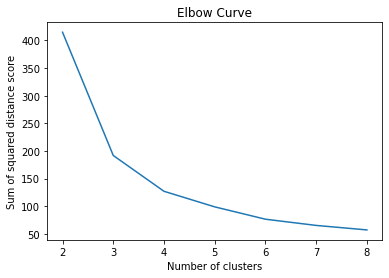

In [255]:
# K-means

ssd = [] # sum of squared distances
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n in range_n_clusters:
    kmeans = KMeans(n_clusters = n, max_iter = 50)
    kmeans.fit(x_scaled)
    ssd.append(kmeans.inertia_)

plt.plot(range_n_clusters, ssd)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance score')
plt.title('Elbow Curve')
plt.show()


Based on above "elbow" curve, k=3 seems to be the optimal number of clusters.

But now we'll further goahead and verify our results with Silhouette Analysis

### Silhouette Analysis

In [256]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n in range_n_clusters:
    kmeans = KMeans(n_clusters = n, max_iter = 50)
    kmeans.fit(x_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    print('The silhoutte score for n = {0} is = {1}'.format(n, round(silhouette_avg, 3)))

The silhoutte score for n = 2 is = 0.541
The silhoutte score for n = 3 is = 0.553
The silhoutte score for n = 4 is = 0.517
The silhoutte score for n = 5 is = 0.479
The silhoutte score for n = 6 is = 0.463
The silhoutte score for n = 7 is = 0.429
The silhoutte score for n = 8 is = 0.409


From the above score we observe that we get the maximum score for silhouette for 3 clusters.

In [257]:
kmeans = KMeans(n_clusters = 3, max_iter = 3, random_state = 1)
kmeans.fit(x_scaled)
#adding back customer ids

x_scaled['cust_segm'] = kmeans.labels_
X['cust_segm'] = kmeans.labels_

In [258]:
x_scaled.head()

,PC1,PC2,cust_segm
0,0.050455,0.759762,1
1,0.663547,0.077411,2
2,-0.013151,-0.053661,0
3,0.138499,-0.147683,0
4,-0.493489,0.400204,1


In [259]:
X.head()

,monetory,frequency,recency,cust_segm
0,5787.243,1.0,325,1
1,4310.000,182.0,1,2
2,1797.240,31.0,74,0
3,1757.550,73.0,18,0
4,334.400,17.0,309,1


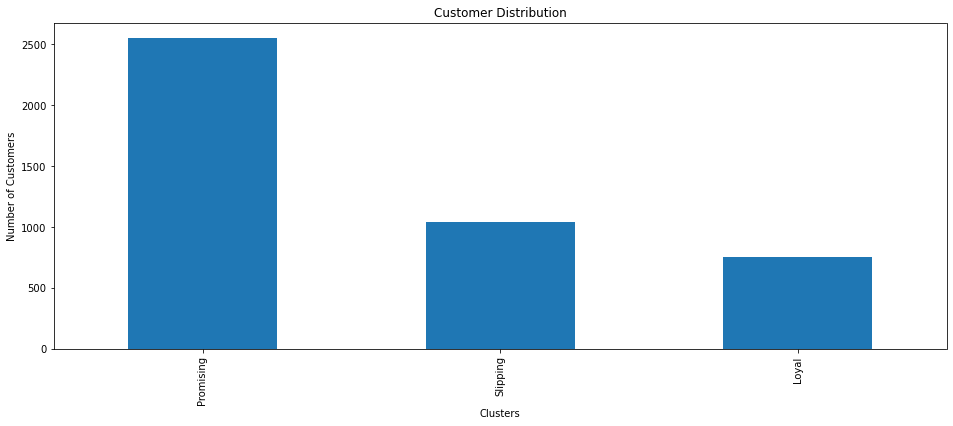

In [260]:
plt.figure(figsize = (16, 6))
ax = x_scaled['cust_segm'].value_counts().plot(kind = 'bar')
ax.set_xticklabels(['Promising','Slipping','Loyal'])
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Clusters')
ax.set_title("Customer Distribution")
plt.show()

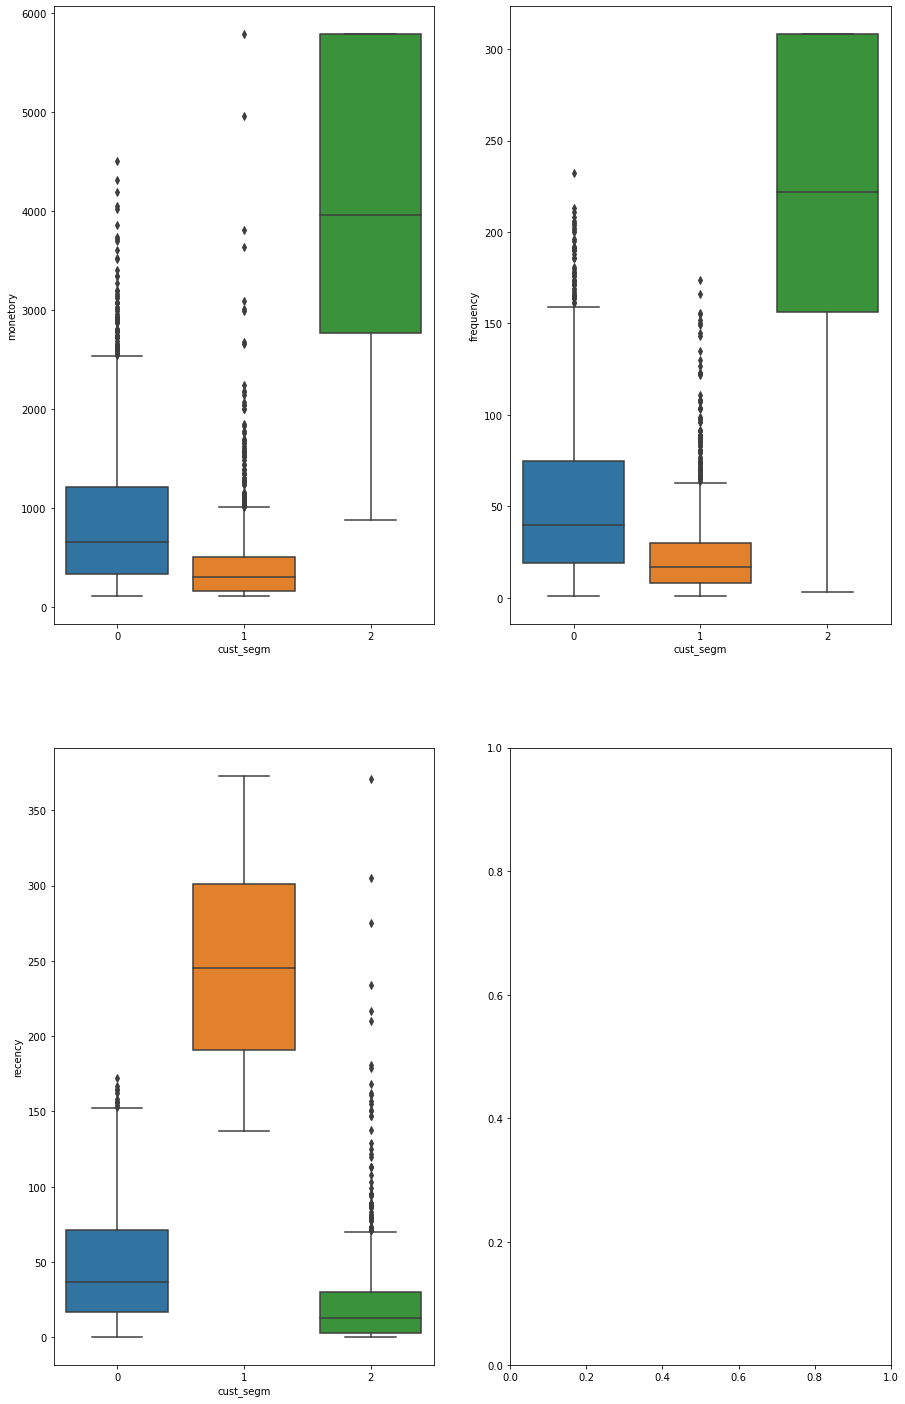

In [261]:
cols = X.columns[0:-1].tolist()
r = c = 0
fig,ax = plt.subplots(2,2,figsize=(15,25))

for n,i in enumerate(cols):
    sns.boxplot(x = 'cust_segm',y=cols[n], data=X, ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
#ax[r,c].axis("off")
plt.show()


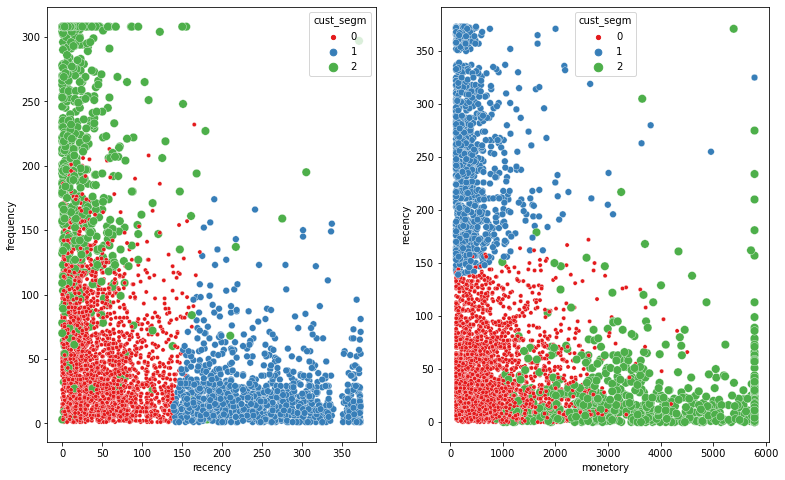

In [263]:
fig = plt.figure(figsize=[20,8])
plt.subplot(1,3,1)
sns.scatterplot(data=X,x="recency",y="frequency",hue="cust_segm",size="cust_segm",palette="Set1")
plt.subplot(1,3,2)
sns.scatterplot(data=X,x="monetory",y="recency",hue="cust_segm",size="cust_segm",palette="Set1")
plt.show()

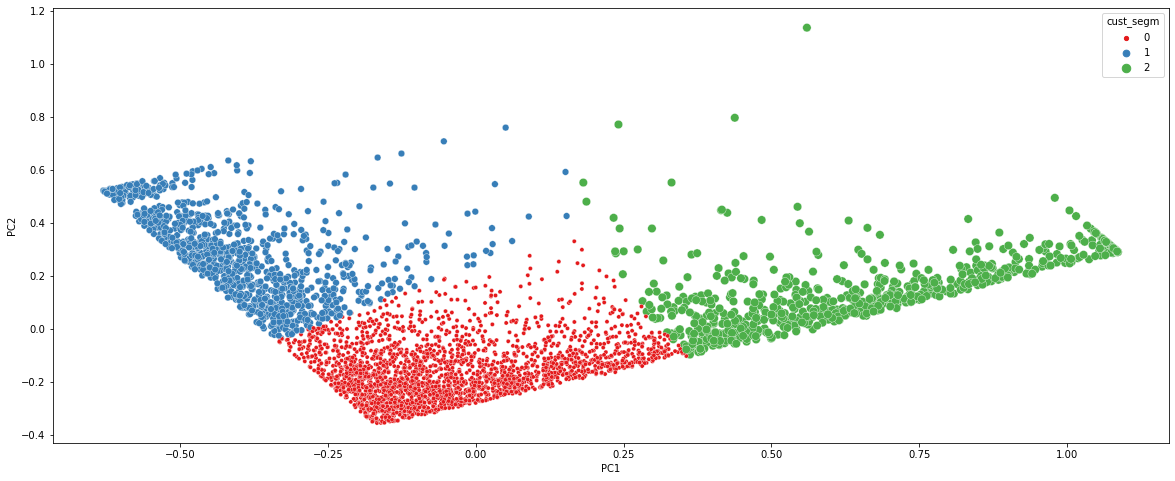

In [266]:
# Vusializing clusters using Principle Components
fig = plt.figure(figsize=[20,8])

sns.scatterplot(data=x_scaled,x="PC1",y="PC2",hue="cust_segm",size="cust_segm",palette="Set1")
plt.show()

#### Customer Segmentation 

1. Cluster 0 - Slipping
2. Cluster 1 - Loyal
3. Cluster 2 - Promising